In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df_brighton = pd.read_csv('Downloads/Project 3/BrightonPerformanceData.csv')

## Data Overview

- Total number of rows and columns in the dataset
- % missing values of each attributes
- Drop some irrelevant columns

In [33]:
df_brighton.shape

(24849, 25)

- There are total 24,849 rows and 25 columns in the dataset

There are some spaces in `City` column so I'll remove it

In [39]:
df_brighton['City'] = df_brighton['City'].str.strip()

In [41]:
# % missing data of the dataset
for col in df_brighton.columns:
    missing_value = df_brighton[col].isna().sum()
    missing_percent = (missing_value/len(df_brighton))*100
    if missing_value > 0:
        print(f'Column {col}: {missing_value} ({missing_percent:.2f})% missing data')


Column Zipcode: 66 (0.27)% missing data
Column cleaning_fee: 9013 (36.27)% missing data


## Feature Classification

Change the datatype of columns in the dataset to suitable datatype 

In [46]:
cat_features = ['Property Type','Listing Type','Currency Native','Airbnb Property ID','Airbnb Host ID','City']

def convert_dtype(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')

convert_dtype(df_brighton, cat_features)

# Correct way to convert multiple columns to datetime
df_brighton[['last_seen', 'Reporting Month']] = df_brighton[['last_seen', 'Reporting Month']].apply(pd.to_datetime, errors='coerce')


## Statistics

### Numerical Features

In [49]:
df_brighton.describe()

,Bathrooms,Latitude,Longitude,last_seen,cleaning_fee,Reporting Month,Blocked Days,Available Days,Occupancy Rate,Reservation Days,ADR (USD),ADR (Native),Number Of Reservation,Revenue (USD),Revenue (Native)
count,24849.000000,24849.000000,24849.000000,24849,15836.000000,24849,24849.000000,24849.000000,24849.000000,24849.000000,24849.000000,24849.00000,24849.000000,24849.000000,24849.000000
mean,1.450400,50.828409,-0.145077,2023-12-12 04:36:07.910177280,51.998564,2023-05-11 16:58:21.340094208,6.347096,24.652904,66.041664,14.021731,195.492374,154.43539,3.416113,2659.029176,2100.631655
min,0.000000,50.807684,-0.227090,2022-07-13 00:00:00,0.000000,2022-11-01 00:00:00,0.000000,1.000000,0.000000,0.000000,11.000000,9.00000,0.000000,0.000000,0.000000
25%,1.000000,50.822070,-0.156930,2024-01-03 00:00:00,0.000000,2023-03-01 00:00:00,1.000000,22.000000,41.700000,7.000000,98.000000,77.00000,1.000000,969.000000,766.000000
50%,1.000000,50.826460,-0.142080,2024-01-03 00:00:00,39.000000,2023-06-01 00:00:00,3.000000,28.000000,70.300000,14.000000,147.000000,116.00000,3.000000,1980.000000,1564.000000
75%,2.000000,50.832315,-0.131010,2024-01-03 00:00:00,78.000000,2023-08-01 00:00:00,9.000000,30.000000,96.900000,21.000000,225.000000,178.00000,5.000000,3427.000000,2707.000000
max,9.000000,50.876110,-0.044820,2024-01-10 00:00:00,566.000000,2023-10-01 00:00:00,30.000000,31.000000,100.000000,31.000000,2708.000000,2139.00000,27.000000,64005.000000,50564.000000
std,0.783798,0.009467,0.024413,NaN,58.669597,NaN,8.109489,8.109489,30.089373,8.346904,179.582532,141.87083,3.496327,2809.913855,2219.829148


- `Bathrooms` columns: There is a listing type which has 0 bathroom (min=0) and one has max=9 bathrooms
- `cleaning_fee` columns: max=566 and min=0
- `Occupancy Rate`: max=100% and min=0%
- `Number of Reservation`: max=27 days and min=0 day
- `Revenue(USD)`: max=64,005 and min=0

### Categorical Feature

In [51]:
df_brighton.describe(include = 'category')

,Property Type,Listing Type,City,Currency Native,Airbnb Property ID,Airbnb Host ID
count,24849,24849,24849,24849,24849,24849
unique,56,4,34,1,3928,2454
top,Entire rental unit,entire_home,Brighton and Hove,USD,74819,9802857
freq,7636,18592,12591,24849,12,645


- There are 56 different types of real estate and the most popular `Property Type` is `Entire rental unit` (7636)
- There has 4 distinct `Listing type` and the most hype is `entire_home` (18592)
- It has 2454 `Airbnb hosts` and 3928 unique `Airbnb Property`
- `Brighton and Hove` is the most popular city which has rooms for renting

## Univariate Distribution

### Categorical Features

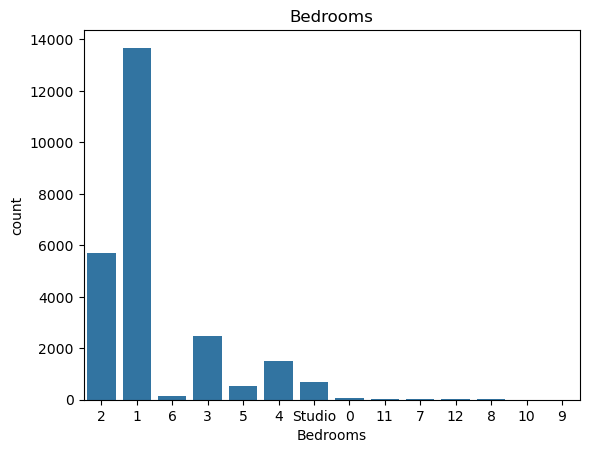

In [56]:
fig, ax = plt.subplots()
sns.countplot(df_brighton, x='Bedrooms')
ax.set(title='Bedrooms');

### Numerical Features

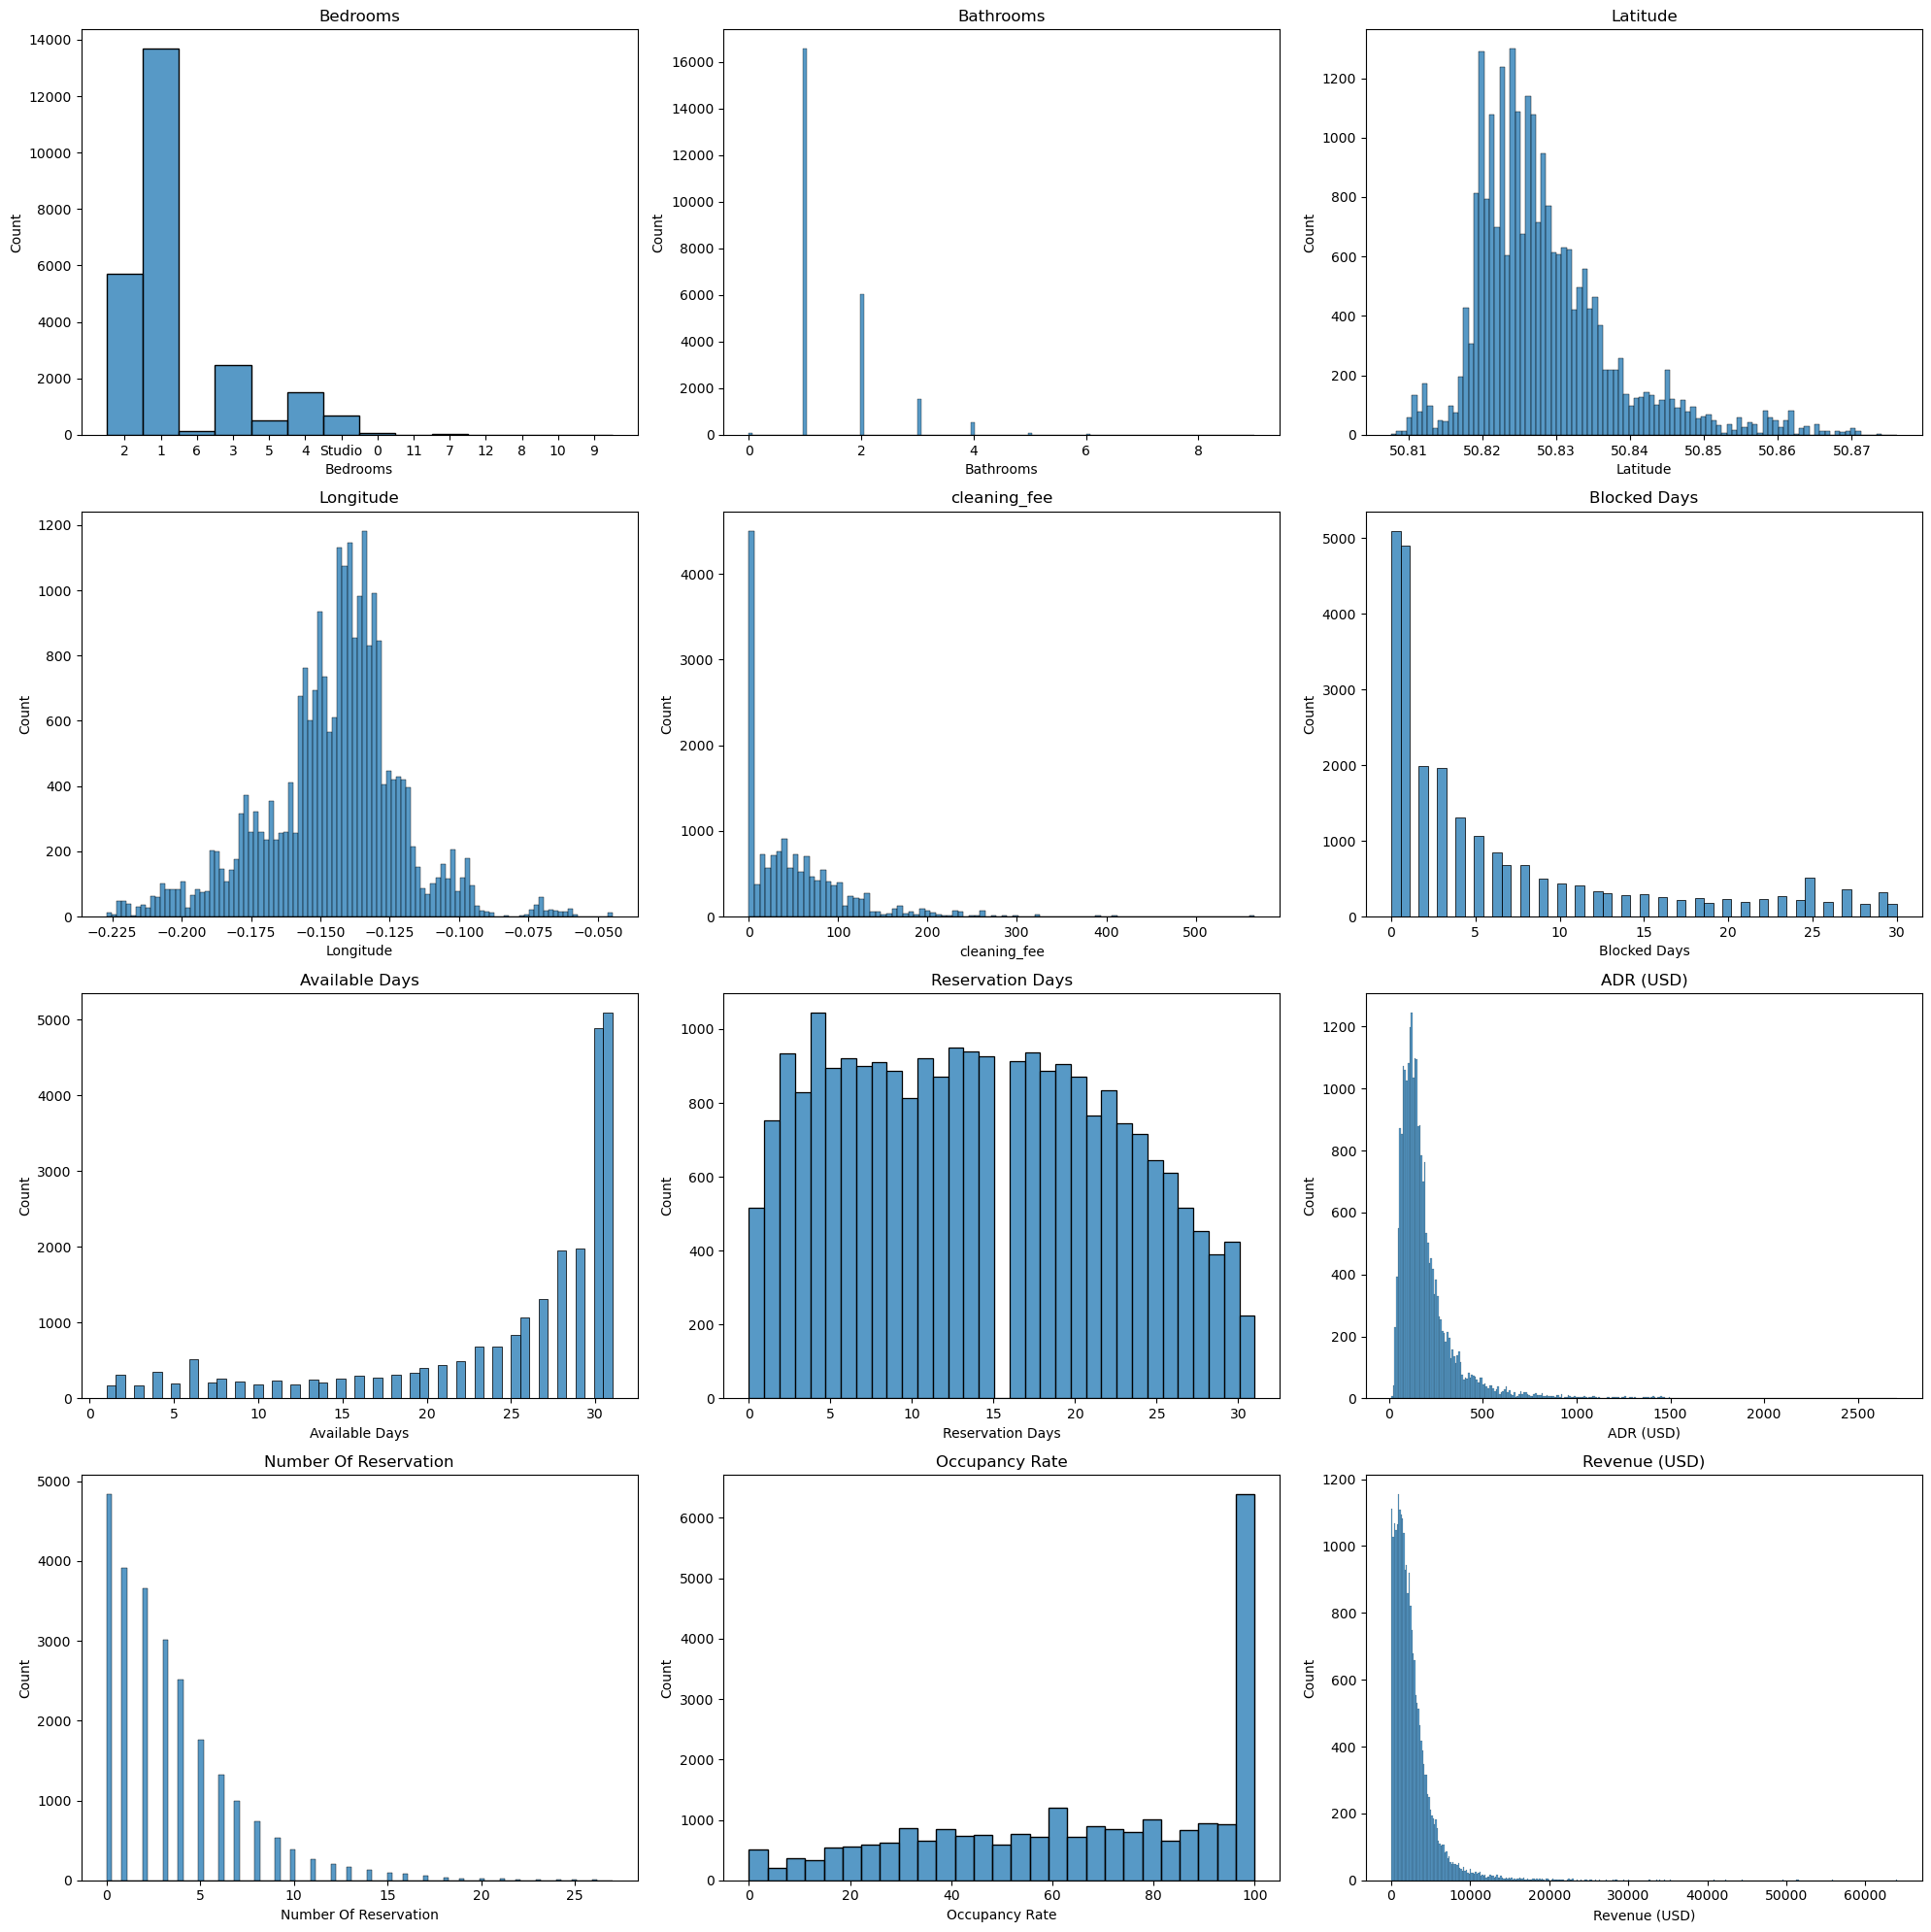

In [58]:
num_columns = ['Bedrooms','Bathrooms','Latitude','Longitude','cleaning_fee','Blocked Days','Available Days',
               'Reservation Days','ADR (USD)','Number Of Reservation','Occupancy Rate','Revenue (USD)']

n_rows=4
n_cols=3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(20,20))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols + c
        if i <len(num_columns):
            ax_i = ax[r,c]
            sns.histplot(df_brighton, x=num_columns[i], ax=ax_i)
            ax_i.set(title=(f'{num_columns[i]}'))
            
plt.tight_layout();

- `Bedrooms` & `Bathrooms`=1 chiếm chủ yếu
- Dựa vào các đồ thị của `Longtitude & Latitude`, số lượng phòng cho thuê ở `Brighton and Hove` - trung tâm của thành phố, lớn hơn so với các quận khác
- Hầu hết `cleaning_fee`<100 và phần lớn là bằng 0
- Phần lớn các phòng cho thuê đều có `Available Days`>25
- Số lượng `Number Of Reservation`<5 chiếm nhiều hơn
- `Occupancy Rate` tập trung chủ yếu ở bin cuối cùng (`Occupancy Rate` > 95%)
- `ADR`,`Revenue`có hầu hết giá trị tập trung ở các bin đầu tiên, phần các bin sau rất dài nhưng có ít giá trị.

## Correlation 

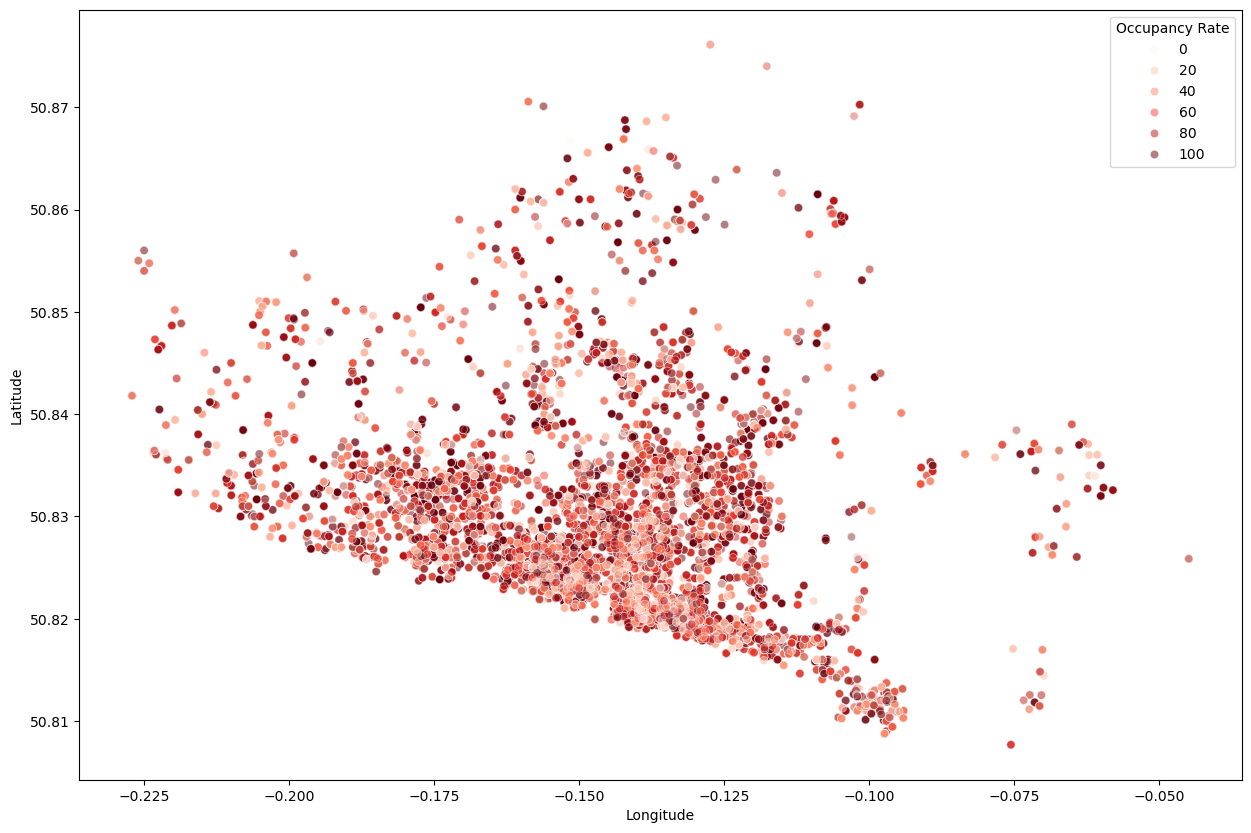

In [119]:
plt.figure(figsize=(15, 10))  
sns.scatterplot(
    data=df_brighton, 
    x='Longitude', 
    y='Latitude', 
    hue='Occupancy Rate',  
    palette='Reds',         
    alpha=0.5);


- While there are a large number of Airbnb homes for rent in the centre of the city Longitude(-0.175;-0.125), the mid-right centre doesn't have high `Occupancy Rate`, might be the pricing was little higher than other locations in the centre of the city.
- High `Occupancy Rate` is concentrated in the Western and North-Eastern of city the centre, which maybe the price is more reasonable and the places are not so far from famous entertainment centers


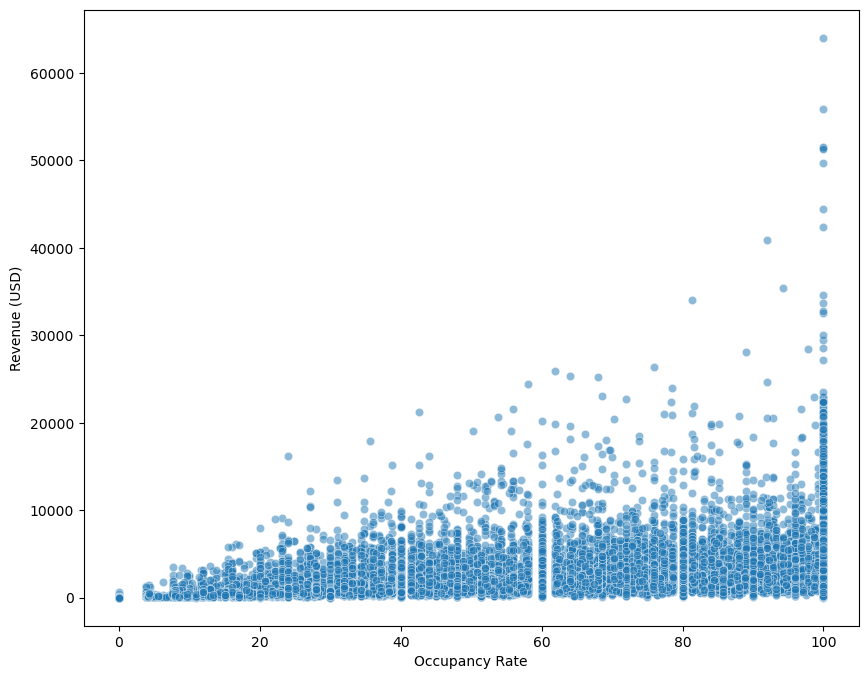

In [145]:
plt.figure(figsize=(10, 8)) 
sns.scatterplot(df_brighton,x='Occupancy Rate',y='Revenue (USD)', alpha=0.5);

- Khi mà `Occupancy Rate` càng cao thì `Revenue` cũng tăng theo
- Tuy nhiên không có giữa khác biệt đáng kể giữa `Occupancy Rate` nằm trong khoảng (40%-95%), khi mà phần lớn `Revenue` nằm trong khoảng (10k,15k)
- `Occupancy Rate`=100% thì doanh thu cao hơn nhiều so với phần còn lại, có thể đạt `Revenue` từ (20k;60k)